## EXAMPLE FUCTION CALLING ##
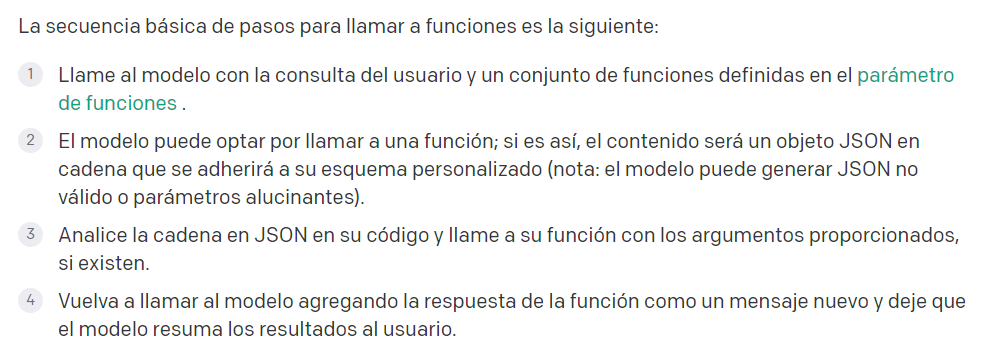

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
import openai
import os

openai.organization = 'org-Y'
openai.api_key = 'sk-XO'

gpt-3.5-turbo-0613

gpt-4-0613

### EXAMPLE 1 ###

In [ ]:
import openai
import json


# Example dummy function hard coded to return the same weather
# In production, this could be your backend API or an external API
def get_current_weather(location, unit="fahrenheit"):
    """Get the current weather in a given location"""
    weather_info = {
        "location": location,
        "temperature": "72",
        "unit": unit,
        "forecast": ["sunny", "windy"],
    }
    return json.dumps(weather_info)


def run_conversation():
    # Step 1: send the conversation and available functions to GPT
    messages = [{"role": "user", "content": "What's the weather like in Boston?"}]
    functions = [
        {
            "name": "get_current_weather",
            "description": "Get the current weather in a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The city and state, e.g. San Francisco, CA",
                    },
                    "unit": {"type": "string", "enum": ["celsius", "fahrenheit"]},
                },
                "required": ["location"],
            },
        }
    ]
    response = openai.ChatCompletion.create(
        model="gpt-4-0613",
        messages=messages,
        functions=functions,
        function_call="auto",  # auto is default, but we'll be explicit
    )
    response_message = response["choices"][0]["message"]

    # Step 2: check if GPT wanted to call a function
    if response_message.get("function_call"):
        # Step 3: call the function
        # Note: the JSON response may not always be valid; be sure to handle errors
        available_functions = {
            "get_current_weather": get_current_weather,
        }  # only one function in this example, but you can have multiple
        function_name = response_message["function_call"]["name"]
        fuction_to_call = available_functions[function_name]
        function_args = json.loads(response_message["function_call"]["arguments"])
        function_response = fuction_to_call(
            location=function_args.get("location"),
            unit=function_args.get("unit"),
        )

        # Step 4: send the info on the function call and function response to GPT
        messages.append(response_message)  # extend conversation with assistant's reply
        messages.append(
            {
                "role": "function",
                "name": function_name,
                "content": function_response,
            }
        )  # extend conversation with function response
        second_response = openai.ChatCompletion.create(
            model="gpt-4-0613",
            messages=messages,
        )  # get a new response from GPT where it can see the function response
        return second_response


print(run_conversation())

{
  "id": "chatcmpl-7alMAMHcaMQWpvQ7PKO3uilJuKS9g",
  "object": "chat.completion",
  "created": 1688996202,
  "model": "gpt-4-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "The current weather in Boston is 72\u00b0 with sunny and windy conditions."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 72,
    "completion_tokens": 15,
    "total_tokens": 87
  }
}


### EXAMPLE 2 ##

In [ ]:
#FUNCION QUE LLAMA
# Example dummy function hard coded to return the same weather
# In production, this could be your backend API or an external API
def get_product_2numbers(number1,number2):
    """Get the product of two numbers """
    return str(number1*number2)


# Step 1, send model the user query and what functions it has access to
def run_conversation():
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo-0613",
        messages=[{"role": "user", "content": "What's the product of 3 and 14"}],
        functions=[
            {
                "name": "get_product_2numbers",
                "description": "Get the product of two numbers",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "number1": {
                            "type": "integer",
                            "description": "The first number, e.g. 1",
                        },
                        "number2": {
                            "type": "integer",
                            "description": "The second number, e.g. 1",
                        },

                    },
                    "required": ["number1","number2"]
                }
            }
        ],
        function_call="auto",
    )
    message = response["choices"][0]["message"]
    print(message)

    # Step 2, check if the model wants to call a function
    if message.get("function_call"):
        function_name = message["function_call"]["name"]
        arguments = json.loads(message["function_call"]["arguments"])

        number1=arguments["number1"]
        number2=arguments["number2"]

        # Step 3, call the function
        # Note: the JSON response from the model may not be valid JSON
        function_response = get_product_2numbers(
            number1,
            number2,
        )

        # Step 4, send model the info on the function call and function response
        second_response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo-0613",
            messages=[
                {"role": "user", "content": "What's the product of 3 and 14?"},
                message,
                {
                    "role": "function",
                    "name": function_name,
                    "content": function_response,
                },
            ],
        )
        return second_response

response=run_conversation()
message = response["choices"][0]["message"]["content"]
print(message)

{
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "get_product_2numbers",
    "arguments": "{\n  \"number1\": 3,\n  \"number2\": 14\n}"
  }
}
The product of 3 and 14 is 42.


## PRUEBA CON NUESTRO CASO DE USO ##
En este caso se usa solo una función

In [ ]:
import openai
import json


# Example dummy function hard coded to return the same weather
# In production, this could be your backend API or an external API
def get_key_information(name, id, city, company, doc_type):
    person_info = {
        "name": name,
        "id": id,
        "city": city,
        "company":company,
        "document_type":doc_type,
    }
    return json.dumps(person_info)

def run_conversation(text):
    response = openai.ChatCompletion.create(
        model="gpt-4-0613",
        messages=[{"role": "user", "content":text}],
        temperature = 0,
    functions = [
        {
            "name": "get_key_information",
            "description": "Get key information from input text",
            "parameters": {
                "type": "object",
                "properties": {
                    "document_type": {
                        "type": "string",
                        "description": "The document type, e.g. letter",
                            },
                    "company": {
                        "type": "string",
                        "description": "The company name, e.g. Colanta",
                            },
                    "name": {
                        "type": "string",
                        "description": "person name,agrega el score de confianza de 0 a 1, e.g. Carlos Alberto Gonzalez Pino [0.96]",
                              },
                    "person_id": {
                        "type": "string",
                        "description": "id number, e.g. 1017165665",
                              },
                    "city": {
                        "type": "string",
                        "description": "The city, e.g. Bogota",
                            },
                },

            },
          }
      ],
            function_call="auto",
    )

    message = response["choices"][0]["message"]
    print(message)
    # Step 2: check if GPT wanted to call a function
    if message.get("function_call"):
        function_name = message["function_call"]["name"]
        arguments = json.loads(message["function_call"]["arguments"])

        document_type=arguments.get("document_type", "unknow type")
        name=arguments.get("name",None)
        id=arguments.get("person_id",None)
        city = arguments.get("city",None)
        company = arguments.get("company",None)
        # Step 3, call the function
        # Note: the JSON response from the model may not be valid JSON
        function_response =get_key_information(
            name,
            id,
            city,
            company,
            document_type,
        )

        # Step 4, send model the info on the function call and function response
        second_response = openai.ChatCompletion.create(
            model="gpt-4-06",
            temperature = 0,
            messages=[
                {"role": "user", "content": text},
                message,
                {
                    "role": "function",
                    "name": function_name,
                    "content": function_response,
                },
            ],
        )
        return second_response

In [ ]:
text = "Konecta\nEL \u00c1REA DE RELACIONES LABORALES\nA, medellin 20 de enero del 2020. la fecha del retiro su cargo era:\ncon un contrato a t\u00e9rmino:\nFijo\nCordialmente.\nCOULANGILE JUNG\nEl se\u00f1or(a):\nGONZALEZ ORREGO ISABEL\nde ciudadan\u00eda No. 1.152.706.941\nhasta el: 05/02/2018\nCERTIFICA QUE:\ntatu zitue\nLIZA CATHERINE ZARRATE PINZON\nJefatura Relaciones Laborales\nCualquier inquietud comunicarse al tel\u00e9fono 510 78 70 o 510 57 00\nidentificado(a) con c\u00e9dula\nlabor\u00f3 en nuestra compa\u00f1\u00eda desde el: 23/05/2017\nREPRESENTANTE DE SERVICIO\nMultienlace S.A.S.\nNit: 811.008.963-6\nOficinas ACI Medell\u00edn\nEspa\u00f1a Argentina Brasil Chile Colomb a Marruecos M\u00e9xico Per\u00fa Portugal Reino Unido\nCalle 38 65-191 Puer to Seco 1-P'so 2 Local 231 PBX: 510 57 OC- FAX (574) 419 47 00 Medellin\nAvenida Calle 24 36-49 Ed. Buro 24 Piso 2 PBX: 343 19 20- FAX (574) 343 19 20 Ext 6622 Bogot\u00e1\nwww.grupokonecta.com\nMultienlace S.A.S\nEscaneado con CamScanner"
print(run_conversation(text))

{
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "get_key_information",
    "arguments": "{\n\"document_type\": \"letter\",\n\"company\": \"Konecta\",\n\"name\": \"GONZALEZ ORREGO ISABEL\",\n\"person_id\": \"1.152.706.941\",\n\"city\": \"Medellin\"\n}"
  }
}
{
  "id": "chatcmpl-7rBhzEnjq2wnEHnBpalPezhNpxwsT",
  "object": "chat.completion",
  "created": 1692910747,
  "model": "gpt-4-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "The document is a letter from Konecta company. It is addressed to GONZALEZ ORREGO ISABEL, who is identified with the ID number 1.152.706.941. The letter is issued in the city of Medellin."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 484,
    "completion_tokens": 54,
    "total_tokens": 538
  }
}


### USANDO VARIAS FUNCIONES ##

In [ ]:
import openai
import json

def run_conversation(text):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo-0613", #"gpt-4-0613"#
        messages=[{"role": "user", "content":text}],
        temperature = 0,
    functions = [
        {
            "name": "get_key_information_from_letter",
            "description": "Get key information from input text of a letter",
            "parameters": {
                "type": "object",
                "properties": {
                    "document_type": {
                        "type": "string",
                        "description": "The document type, e.g. letter",
                            },
                    "company": {
                        "type": "string",
                        "description": "The company name, e.g. Colanta",
                            },
                    "name": {
                        "type": "string",
                        "description": "person name, e.g. Carlos Alberto Gonzalez Pino",
                              },
                    "letter_date": {
                        "type": "string",
                        "description": "letter date, e.g. 25 de febrero del 2012",
                            },
                    "person_id": {
                        "type": "string",
                        "description": "id number, e.g. 1017165665",
                              },
                    "city": {
                        "type": "string",
                        "description": "The city name, e.g. Bogota",
                            },
                    "fecha_ingreso": {
                        "type": "string",
                        "description": "date of admission, e.g. 23/05/2018",
                            },
                    "fecha_salida": {
                        "type": "string",
                        "description": "departure date, e.g. 23/05/2019",
                            },
                    "valor_retiro": {
                        "type": "string",
                        "description": "withdrawal value, e.g. 2.500.660",
                            },
                    "concepto_retiro": {
                        "type": "string",
                        "description": "withdrawal concept, e.g. mejoras de vivienda",
                            },
                },

            },
          },

        {
            "name": "get_key_information_from_identification_card",
            "description": "Get key information from input text of identification card",
            "parameters": {
                "type": "object",
                "properties": {
                    "document_type": {
                        "type": "string",
                        "description": "The document type, e.g. identification card",
                            },
                    "birthday": {
                        "type": "string",
                        "description": "the birthday of person, e.g. 25/06/1996",
                            },
                    "names": {
                        "type": "string",
                        "description": "person name Only return your confidence score for each option. Do not explain. Higher means you think it’s more likely to be the correct answer. For example, {“A”: 0.9, “B”: 0.1, “C”: 0.2,“D”: 0.1}., e.g. Carlos Alberto Gonzalez Pino",
                              },
                    "number_id": {
                        "type": "string",
                        "description": "id number, e.g. 1017165665",
                              },
                    "birth_city": {
                        "type": "string",
                        "description": "The birth city, e.g. Bogota",
                            },
                    "expedition": {
                        "type": "string",
                        "description": "The expedition date city, e.g. 04-MAR-2011 Bogota",
                            },
                    "sexo": {
                        "type": "string",
                        "description": "The gender, e.g. M",
                            },
                    "estatura": {
                        "type": "string",
                        "description": "person's height, e.g. 1.70",
                            },
                },

            },
          },

        {
            "name": "get_key_information_from_curp",
            "description": "Get key information from input text of curp",
            "parameters": {
                "type": "object",
                "properties": {
                    "document_type": {
                        "type": "string",
                        "description": "The document type, e.g. identification card",
                            },
                    "names": {
                        "type": "string",
                        "description": "person name, e.g. Carlos Alberto Gonzalez Pino",
                              },
                    "clave": {
                        "type": "string",
                        "description": "clave number, e.g. SCRPL1017165665",
                              },
                    "fecha_inscripcion": {
                        "type": "string",
                        "description": "registration date, e.g. 02/10/1999",
                            },
                    "entidad_registro": {
                        "type": "string",
                        "description": "registration city, e.g. PUEBLA",
                            },
                    "folio": {
                        "type": "string",
                        "description": "folio number, e.g. 5897762",
                            },
                },
            },
          },

        {
            "name": "get_key_information_from_ine",
            "description": "Get key information from input text of ine",
            "parameters": {
                "type": "object",
                "properties": {
                    "document_type": {
                        "type": "string",
                        "description": "The document type, e.g. identification card",
                            },
                    "birthday": {
                        "type": "string",
                        "description": "the birthday of person, e.g. Colanta",
                            },
                    "names": {
                        "type": "string",
                        "description": "person name, e.g. Carlos Alberto Gonzalez Pino",
                              },
                    "clave_elector": {
                        "type": "string",
                        "description": "id number, e.g. XXCRPL1017165665",
                              },
                    "curp": {
                        "type": "string",
                        "description": "The curp number, e.g. XXCRPL78123321",
                            },
                    "registro": {
                        "type": "string",
                        "description": "The registration date, e.g. 2000 02",
                            },
                    "vigencia": {
                        "type": "string",
                        "description": "The validity date, e.g. 2021 - 2031",
                            },
                    "domicilio": {
                        "type": "string",
                        "description": "The adress, e.g. Medellin cr 90 aa # 65 ee 65",
                            },
                    "sexo": {
                        "type": "string",
                        "description": "The gender, e.g. M",
                            },
                    "folio": {
                        "type": "string",
                        "description": "folio number, e.g. 5897762",
                            },
                },
            },
          },
        {
            "name": "get_key_information_om",
            "description": "Get key information from input text of medical order",
            "parameters": {
                "type": "object",
                "properties": {
                    "document_type": {
                        "type": "string",
                        "description": "The document type, e.g. identification card",
                            },
                    "prestador": {
                        "type": "string",
                        "description": "the name of the branch, e.g. UAP Santa Marta",
                            },
                    "name": {
                        "type": "string",
                        "description": "person name, e.g. Carlos Alberto Gonzalez Pino",
                              },
                    "NIT": {
                        "type": "string",
                        "description": "NIT number, e.g. 810536548",
                              },
                    "city": {
                        "type": "string",
                        "description": "The city name, e.g. Medellín",
                            },
                    "date": {
                        "type": "string",
                        "description": "The approval date, e.g. 25/03/2021",
                            },
                    "number_id": {
                        "type": "string",
                        "description": "id number, e.g. 1017165665",
                              },
                    "id_type": {
                        "type": "string",
                        "description": "id type, e.g. CC",
                              },
                    "diagnostico": {
                        "type": "string",
                        "description": "The diagnosis code, e.g. (Z344)(I463)",
                            },
                    "procedimientos": {
                        "type": "string",
                        "description": "medical procedures in python dictionary, e.g. {'cups':903844, 'procedure': UROANALISIS, 'Cantidad':1}",
                            },
                    "doctor_name": {
                        "type": "string",
                        "description": "doctor's name, e.g. Marcela Ocampo Gonzalez",
                            },
                    "doctor_id": {
                        "type": "string",
                        "description": "doctor's id number, e.g. 1017657689",
                            },
                    "doctor_speciality": {
                        "type": "string",
                        "description": "doctor's medical speciality, e.g. Medicina general",
                            },
                },

            },
          },
        {
            "name": "other_format",
            "description": "if it doesn't fit a format",
            "parameters": {
                "type": "object",
                "properties": {
                    "document_type": {
                        "type": "string",
                        "description": "The document type, e.g. unknow format",
                            },
                },

            },
          }
      ],
            function_call="auto",
    )
       #dictionary
    message = response["choices"][0]["message"]
    print(message)
    print(response)

In [ ]:
#id porvenir 1: porvenir_dev_1019
text_porvenir1 = "E&S\nBogot\u00e1, 05 de agosto de 2022\nSe\u00f1ores:\nPORVENIR\nCiudad\nAsunto: Retiro parcial de Cesant\u00edas mejoras de vivienda.\nSeg\u00fan los dispuesto en el art\u00edculo 21 de la ley 1429 de 2010 (que modific\u00f3 el Art.\n256 del C\u00f3digo Sustantivo del Trabajo) y a la aclaraci\u00f3n contenida en la Carta\nCircular 011 del 7 de febrero de 2011 del Ministerio de Protecci\u00f3n Social, nos\npermitimos informarles que hemos autorizado el retiro parcial de cesant\u00edas para\nmejoras de vivienda del colaborador (a) se\u00f1alado m\u00e1s adelante, en las siguientes\ncondiciones:\nNombre del funcionario:\nIdentificaci\u00f3n:\nValor del Retiro:\nConcepto de Retiro:\nPara ser Girado a:\nCordialmente;\nIvan Alexander Caro Romero\nCC 79744370\n$1.700.000.00\nMEJORAS DE VIVIENDA\nTransferencia Bancaria\nEl empleador ha verificado que el trabajador va a utilizar sus cesant\u00edas en las\ninversiones u operaciones permitidas por la ley.\nEngineering & Services\nTraining, Consulting and Engineering Services\nFirma del empleador:\nSOME OF\nIsabel Casta\u00f1eda Nova\nCoordinadora Recursos H\nC.C. 52.228.391\nE&S JF S.A.S.\nNIT 00.576.279-4\nFirma del Trabajador:\nIvan Alexander Caro Romero\nIngeniero\nC.C. 79744370\nCarrera 70h # 116-55 Bogot\u00e1, Colombia - Tel: +571 3782992 - Mobile: +57 316 5226761\nCalle la Campi\u00f1a No 73 Colonia Los Pastores C.P. 53.\nNaucalpan de Ju\u00e1rez\nEstado de M\u00e9xico, M\u00e9xico - Mobile: +52 1 55725851 +52 1 5572585846\nwww.eysglobal.com"
# id porvenir2 : local files: zz_1
text_porvenir = "Konecta\nEL \u00c1REA DE RELACIONES LABORALES\nA, medellin 20 de enero del 2020. la fecha del retiro su cargo era:\ncon un contrato a t\u00e9rmino:\nFijo\nCordialmente.\nCOULANGILE JUNG\nEl se\u00f1or(a):\nGONZALEZ ORREGO ISABEL\nde ciudadan\u00eda No. 1.152.706.941\nhasta el: 05/02/2018\nCERTIFICA QUE:\ntatu zitue\nLIZA CATHERINE ZARRATE PINZON\nJefatura Relaciones Laborales\nCualquier inquietud comunicarse al tel\u00e9fono 510 78 70 o 510 57 00\nidentificado(a) con c\u00e9dula\nlabor\u00f3 en nuestra compa\u00f1\u00eda desde el: 23/05/2017\nREPRESENTANTE DE SERVICIO\nMultienlace S.A.S.\nNit: 811.008.963-6\nOficinas ACI Medell\u00edn\nEspa\u00f1a Argentina Brasil Chile Colomb a Marruecos M\u00e9xico Per\u00fa Portugal Reino Unido\nCalle 38 65-191 Puer to Seco 1-P'so 2 Local 231 PBX: 510 57 OC- FAX (574) 419 47 00 Medellin\nAvenida Calle 24 36-49 Ed. Buro 24 Piso 2 PBX: 343 19 20- FAX (574) 343 19 20 Ext 6622 Bogot\u00e1\nwww.grupokonecta.com\nMultienlace S.A.S\nEscaneado con CamScanner"
#id cc:51ca597a-1845-11ed-aa9d-82d8fe09962b
text_cc = "REPUBLICA DE COLOMBIA\nIDENTIFICACION PERSONAL\nCEDULA DE CIUDADANIA\nNUMERO 1.075.269.213\nGALINDEZ GUERRERO\nAPELLIDOS\nFABIAN ORLANDO\nNOMBRES\nINDICE DERECHO\nFIRMA\nFECHA DE NACIMIENTO 11-FEB-1993\nISNOS\n(HUILA)\nLUGAR DE NACIMIENTO\n1.72\nESTATURA\nO+\nG.S. RH\nM\nSEXO\n04-MAR-2011 NEIVA\nFECHA Y LUGAR DE EXPEDICION -\nREGISTRADOR NACIONAL\nCARLOS ARIEL S\u00c1NCHEZ TORRES\nP-1900100-00331529-M-1075269213-20110906 0027938610A 1 36210833\nScanned with CamScanner"
#id ine: ine_dev_19
text_ine= "TADOR\nM\u00c9XICO\nRes\nINSTITUTO NACIONAL ELECTORAL\nCREDENCIAL PARA VOTAR\nNOMBRE\nCORTES\nMARIA DEL PILAR\nDOMICILIO\nPRIV CAPULIN 12 81\nFRACC VILLAS DE SAN FACUNDO || 72700\nCUAUTLANCINGO, PUE.\nCLAVE DE ELECTOR XXCRPL78101221M300\nCURP\nCOXP781012MPLRXL00\nFECHA DE NACIMIENTO\n12/10/1978\nA\u00d1O DE REGISTRO\n2000 02\nSECCI\u00d3N VIGENCIA\n0325\n2021 - 2031\nSEXO M\nEscaneado con CamScanner"
#id om sanitas: test_extract_1
text_om = "EPS SANITAS UAP Santa Marta - NIT. 800251440 Direcci\u00f3n: Calle 22 N\u00ba 20A 66 T\u00e9lefono: null SOLICITUD DE PROCEDIMIENTOS DE PROMOCI\u00d3N Y PREVENCI\u00d3N No.52691172 NUMERO DE APROBACION: 188755946 SANTA MARTA ( DISTRITO TURISTICO CULTURA ) - 21/06/2022, 11:26:15 Nombre: MARIA CAMILA PALACIO URBINA Identificaci\u00f3n: CC 1122415163 Contrato E.P.S Sanitas: 10 7104258 1 1 Tipo de Usuario: Contributivo Sexo: Femenino - Edad: 24 A\u00f1os Historia Cl\u00ednica: 1122415163 DIAGN\u00d3STICO: ( Z359 ) ( I499 ) No PROCEDIMIENTO 1 907106 - UROANALISIS Cantidad 1 2 903844 - GLUCOSA CURVA DE TOLERANCIA ( Incluye Carga de Glucosa ) Cantidad 1 3 902210 - HEMOGRAMA IV ( HEMOGLOBINA HEMATOCRITO RECUENTO DE ERITROCITOS INDICES ERITROCITARIOS LEUCOGRAMA RECUENTO DE PLAQUETAS INDICES PLAQUETARIOS Y MORFOLOGIA ELECTRONICA E HISTOGRAMA ) AUTOMATIZADO Cantidad 1 ORDEN M\u00c9DICA CON AUTORIZACI\u00d3N APROBADA jJimenez de Por favor comunicarse con LABORATORIO CLINICO SANTA MARTA CL 22 20 A - 66 PISO 2, 4231030 ; 5753078, SANTA MARTA ( DISTRITO TURISTICO CULTURA ) - MAGDALENA ORDEN M\u00c9DICA V\u00c1LIDA POR 120 D\u00cdAS A PARTIR DE LA FECHA DE EXPEDICI\u00d3N DATOS DEL M\u00c9DICO Beating Jev\u00e9rez EPS Sanitas9 PROMOCI\u00d3N Y PREVENCION Beatriz J. Jim\u00e9nez R. MEDICO GENERAL RM. 9220 UNIMAGDALENA BEATRIZ JOHANA JIMENEZ REGALADO - Medicina General CC 36693860 - Registro m\u00e9dico 36693860 Original"
#id om2 SIES: test_extract_2
text_om2 = " SOCIEDAD INTEGRAL DE ESPECIALISTAS EN SALUD NIT: 900123436 - 0 Actividad Economica: 8621 R\u00e9gimen: Com\u00fan Sede: Barranquilla - Nefro C\u00f3digo Habilitaci\u00f3n: 080010490301 Identificaci\u00f3n CC 22300108 Fecha nac. ( 9/11/193685 a\u00f1os ) Tel. 3882288 - 3136075091 Direcci\u00f3n CRA. 72 # 94 - 63 AP 502C Municipio BARRANQUILLA Departamento ATL\u00c1NTICO Tipo de zona Zona Urbana ALICIA VILLADA DE TENA Sexo al nacer Mujer Edad ingreso 85 a\u00f1os Fecha orden 15/07/2022 04:16 p.m. Fecha ingreso 15/07/2022 7:50:00 a.m. Fecha egreso 16/07/2022 1:00:00 a.m. Ubicaci\u00f3n Consulta Externa Nefro Barranquilla Clase de ingreso Consulta Externa SiES ALUD ADMISION No. 1396531 ORDEN M\u00c9DICA O TRANSCRIPCI\u00d3N Da. ENFERMEDAD RENAL CR\u00d3NICA. ETAPA 4 N184 # 1 VITAMINA D 25 DIHIDROXI ( 903706 ) Dx. ENFERMEDAD RENAL CR\u00d3NICA, ETAPA 4 N184 FECHA: 2022/07/15 16:19. VIGENCIA: 2022/08/14 16:19 ( 1Un ) 2 SODIO ( 903864 ) Dx. ENFERMEDAD RENAL CR\u00d3NICA, ETAPA 4 N184 FECHA: 2022/07/15 16:19. VIGENCIA: 2022/08/14 16:19 1 ( Un ) 3 TIROXINA LIBRE ( T4L ) ( 904921 ) Dx. ENFERMEDAD RENAL CR\u00d3NICA, ETAPA 4 N184 FECHA: 2022/07/15 16:19. VIGENCIA: 2022/08/14 16:19 1 ( Un ) Origen Consulta Externa Servicio Geriatria Contrato ENTIDAD PROMOTORA DE SALUD SANITAS Procedimientos NO Qx Dr. David Jose Cora fron C.C. 1010177Q40 Mrde especialista en Gerialna Pontificia Universidad Javeriana R.M. 253005/2013 S.A.S NIT 800251440 |Plan CONTRIBUTIVO Cotizante ERC SANITAS PQT PROGRAMA ESPECIAL - Cantidad VIGILADA POR SUPERINTENDENCIA DE SALUD CRA 51 # 84 187 BARRIO SAN VICENTE, BARRANQUILLA - ATL\u00c1NTICO - Tel: 3091858 ext 2800 Imprime: MAURA VANESSA SANCHEZ HERAZO Fecha Imp. 19/07/2022 1:15:00 p. m. Generado por: GOMEDISYS - Raz\u00f3n social: WELII COLOMBIA SAS NIT: 900.723.696 3 P\u00e1gina 1 de l"
#id om3: test_extract_3
text_om3=" UROBOSQUE Centro Urol\u00f3gico ORDEN MEDICA Nombre: JAIRO PINZON GARCIA Identificaci\u00f3n 19451874 Edad: 61 A\u00f1os Sexo: Masculino Fecha: 2022-07-29 Entidad: EPS SANITAS SAS Vinculaci\u00f3n: cotizante Sede Norte Ed. El Bosque Calle 134 # 7 - 83 Piso 6 Torre 3 CallCenter:6482254 informacion @urobosque.com Tel\u00e9fono: 3103858925 Solicitud de: 890394 Impreso por Icbut P\u00e1gina de 1 Sede Centro Ed. Urobosque Carrera 32 # 25b - Bogot\u00e1-Colombia www.urobosque.cc .. CONSULTA DE CONTROL O DE SEGUIMIENTO POR ESPECIALISTA DE UROLOGIA CITA CON RESULTADO UROBOSQUE Observaciones: KO UROLOGIEY 350 PAULA MARCELA ESPARZA RM: 63451458 R.M. 63.451.458 M\u00e9dico Ur\u00f3logo Dra. Paula Marcela Esparza"
text_om_hw1="Cc: 1020832 324 FECHA: colsanitas Centro M\u00e9dico 04/12/22 NOMBRE: John Jairo Nore\u00f1a - Serologia RPR \u00b7 Clamidia Trachomatys 196 - Clamiche Trachomatys 1gM. - VIH elisa - uro alarLisis RM onbsog ia per aria Torres 746881270"
#id curp: 904ae36c-d3df-11ed-9ca0-4a04e3f28da9 en prod
text_curp = "SEGOB SECRETARIA DE GOBERNACI\u00d3N ESTADOS UNIDOS MEXICANOS CONSTANCIA DE LA CLAVE \u00daNICA DE REGISTRO DE POBLACI\u00d3N S UNIDOS Clave: SABA680608HPLNZR09 Nombre O STAC OSS ARTURO MARIO SAN MARTIN BAZAN Soy M\u00e9xico Fecha de inscripci\u00f3n 03/11/1997 Folio 5678357 DIRECCI\u00d3N GENERAL DEL REGISTRO NACIONAL DE POBLACI\u00d3N E IDENTIDAD Entidad de registro PUEBLA CURP Certificada: verificada con el Registro Civil 121114197300344"
#id curp2: 904ae36c-d3df-11ed-9ca0-4a04e3f28da9 en prod
text_curp2 = "ESTADOS UNIDOS MEXICANOS CONSTANCIA DE LA CLAVE UNICA DE REGISTRO DE POBLACI\u00d3N UNII SEGOB SECRETARIA DE GOBERNACI\u00d3N Clave: FORM900526MDFLMR08 Nombre MARIANA ELIZABETH FLORES ROMO Soy M\u00e9xico Fecha de inscripci\u00f3n 28/02/1998 Folio 10972133 DIRECCI\u00d3N GENERAL DEL REGISTRO NACIONAL DE POBLACI\u00d3N E IDENTIDAD Entidad de registro DISTRITO FEDERAL"
text_random = "La Tabla Periódica de los elementos es un registro de todos los elementos químicos conocidos por la humanidad. Los elementos están ordenados en forma de tabla según su número atómico (número de protones), su configuración electrónica y sus propiedades químicas. En esta tabla los elementos están organizados en filas y columnas que muestran cierta periodicidad: los elementos que pertenecen a una misma columna tienen propiedades similares. En principio, toda la materia conocida del universo está compuesta por diversas combinaciones de los 118 elementos, registrados en la Tabla Periódica."
run_conversation(text_om3)

{
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "get_key_information_om",
    "arguments": "{\n  \"document_type\": \"medical order\",\n  \"prestador\": \"UROBOSQUE Centro Urol\u00f3gico\",\n  \"name\": \"JAIRO PINZON GARCIA\",\n  \"number_id\": \"19451874\",\n  \"date\": \"2022-07-29\",\n  \"diagnostico\": \"KO UROLOGIEY\",\n  \"doctor_name\": \"Dra. Paula Marcela Esparza\"\n}"
  }
}
{
  "id": "chatcmpl-7u19pPiddjhFVieGHj9mtxG9IMeag",
  "object": "chat.completion",
  "created": 1693585173,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": null,
        "function_call": {
          "name": "get_key_information_om",
          "arguments": "{\n  \"document_type\": \"medical order\",\n  \"prestador\": \"UROBOSQUE Centro Urol\u00f3gico\",\n  \"name\": \"JAIRO PINZON GARCIA\",\n  \"number_id\": \"19451874\",\n  \"date\": \"2022-07-29\",\n  \"diagnostico\": \"KO UROLOGIEY\",\